## Fake News Detection

### Context:
In this day in age of technology and social media where anybody can make a post and make it seem proper/true it has become difficult to determine the validity of several news. The danger of fake news can manipulate people's perception of reality, influence politics, and promote false advertising. It has become a method to stir up and intensify social conflict. Stories that are untrue and that intentionally mislead reader have caused a growing mistrust and confusion amongst the American people. 

### Goal: 
Try to predict whether a news article contains fake news. 

In [67]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import re
import string

In [2]:
# load the Fake news data
fake_url = "https://drive.google.com/file/d/1aKRkoiMM-SKO0VdCCDqhGtIfSVzBuKaq/view?usp=drive_link"
fake_path = "https://drive.google.com/uc?id=" + fake_url.split("/")[-2]
data_fake = pd.read_csv(fake_path)

# load the Real news data
true_url = "https://drive.google.com/file/d/1a_8IyDJVO9r_fQ3EaIPyEbOlO-gdH_AN/view?usp=drive_link"
true_path = "https://drive.google.com/uc?id=" + true_url.split("/")[-2]
data_true = pd.read_csv(true_path)

In [3]:
# observe the first 5 rows of Fake News
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
data_fake['text'][4]

'Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentioning his name. The Pope delivered his message just days after members of the United Nations condemned Trump s move to recognize Jerusalem as the capital of Israel. The Pontiff prayed on Monday for the  peaceful coexistence of two states within mutually agreed and internationally recognized borders. We see Jesus in the children of the Middle East who continue to suffer because of growing tensions between Israelis and Palestinians,  Francis said.  On this festive day, let us ask the Lord for peace for Jerusalem and for all the Holy Land. Let us pray that the will to resume dialogue may prevail between the parties and that a negotiated solution can finally be reached. The Pope went on to plead for acceptance of refugees who have been forced from their homes, and that is an issue Trump continues to fight against. Francis used Jesus for which there was  no place in the inn  as an analogy. Today, as

In [5]:
# Observe the first 5 rows of True news
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
# create our target variable for both data frames
# if news article is fake it will be denoted as 0
data_fake['class'] = 0
# if news article is true it will be denoted as 1
data_true['class'] = 1

In [7]:
data_fake.head(3)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0


In [8]:
# shape of both data frames
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [9]:
# putting last 10 rows of fake news into a data frame
data_fake_manual_testing = data_fake.tail(10)

# dropping the last 10 rows of fake news from original fake news df
for i in range(23480, 23470, -1):
    data_fake.drop([i], axis = 0, inplace = True)

# putting last 10 rows of true news into a data frame
data_true_manual_testing = data_true.tail(10)

# dropping the last 10 rows of fake news from original fake news df
for i in range(21416, 21406, -1):
    data_true.drop([i], axis = 0, inplace = True)

In [10]:
# check both data frames dimensions after dropping the last 10 rows
data_fake.shape, data_true.shape

((23471, 5), (21407, 5))

In [11]:
# looking at the 10 fake news observations we placed in a data frame
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [12]:
# look at the 10 observations of true news we placed in a dataframe
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [13]:
# combine the 2 data frames containing both fake and true news 
# combing the two frames on the rows axis
data_merge = pd.concat([data_fake,data_true], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [14]:
# checking the columns of the combined data frames
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [15]:
# dropping the columns title, subject, date and putting into a new data frame
# only keeping the text and class
text = data_merge.drop(['title','subject','date'], axis = 1)

In [16]:
# check for missing values
text.isna().sum()

text     0
class    0
dtype: int64

In [17]:
# shuffle our data frame
text = text.sample(frac = 1)
text.head()

,text,class
14554,"Seven years ago, this story would ve seemed li...",0
14690,BERLIN (Reuters) - The European Union and Brit...,1
8599,Sarah Palin is an idiot. While this has been c...,0
18474,WASHINGTON (Reuters) - The U.S. Supreme Court ...,1
12324,,0


In [18]:
# reset the index
text.reset_index(inplace = True)

# drop the old index
text.drop(['index'], axis = 1, inplace = True)

In [19]:
# recall we only kept text and class for the data frame
text.columns

Index(['text', 'class'], dtype='object')

In [20]:
# observing the shuffled and new index data frame
text.head()

,text,class
0,"Seven years ago, this story would ve seemed li...",0
1,BERLIN (Reuters) - The European Union and Brit...,1
2,Sarah Palin is an idiot. While this has been c...,0
3,WASHINGTON (Reuters) - The U.S. Supreme Court ...,1
4,,0


In [21]:
# first observation text
text['text'][3]

'WASHINGTON (Reuters) - The U.S. Supreme Court on Monday rejected New Zealand-based internet mogul Kim Dotcom s challenge to the U.S. government s bid to seize assets held by him and others involved in the now-defunct streaming website Megaupload. The justices left in place a lower court ruling that the U.S. government could seize up to $40 million in assets held outside the United States as part of a civil forfeiture action being pursued in parallel with criminal charges for alleged copyright violations and money laundering. Dotcom and several other defendants have contested U.S. attempts to extradite them from New Zealand. German-born entrepreneur Dotcom is wanted by U.S. law enforcement authorities on copyright and money-laundering allegations related to Megaupload, which was shut down in 2012 following an FBI-ordered raid on his Auckland mansion. He was indicted the same year along with fellow Megaupload executives.  It s no surprise because the chance to be heard by the U.S. Supre

In [22]:
# create a function to process text

def wordopt(text):
    text = text.lower() # lower case 
    text = re.sub('\[.*?\]','',text) # remove anything with and within brackets
    text = re.sub('\\W',' ',text) # removes any character not a letter, digit, or underscore
    text = re.sub('https?://\S+|www\.\S+','',text) # removes any links starting with https
    text = re.sub('<.*?>+','', text) # removes anything with and within < >
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # removes any string with % in it 
    text = re.sub('\n','',text) # remove next lines
    text = re.sub('\w*\d\w*','', text) # removes any string that contains atleast a digit with zero or more characters
    return text

In [23]:
# apply the function to the text column
text['text'] = text['text'].apply(wordopt)

In [24]:
# observing the updated text
text['text'][0]

'seven years ago  this story would ve seemed like something from  the onion   a satirical publication   unfortunately where barry sotoero  aka barack hussein obama is concerned  nothing is unbelievable  and truth seems to be stranger than fiction  recently  a new foreign intelligence service  svr  report was released stating that one of the united states navy s top commanders was released from command after he sent out an email revealing that president barack obama was in the process of purchasing a multi million dollar seaside villa in dubai the report indicates that rear admiral rick williams  commander of the us navy s carrier strike group   posted a query on january  to the naval institutes  readiness kill chain   it inquired why navy security and intelligence personal had been dispatched from a naval support facility in thurmont to an  obama house hunting mission   the message has since been deleted as to the  obama house hunting mission  admiral williams was making his query abou

## Split the data

In [25]:
# our predictor variable
X = text['text']

# our target variable
y = text['class']

In [26]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

## Vectorizer

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score

TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects how important a word is to a document in a collection or corpus. The TF-IDF score is calculated by multiplying the term frequency (TF) and the inverse document frequency (IDF). The term frequency is the number of times a word appears in a document, and the inverse document frequency is the logarithmically scaled inverse fraction of the documents that contain the word.

In [28]:
# instantiate our TfidfVectorizer
vectorizer = TfidfVectorizer()

# fit transform our document (X_train)
tfidf_train = vectorizer.fit_transform(X_train)

# transform our X_test 
# note we dont have to fit the testing set
tfidf_test = vectorizer.transform(X_test)

In [29]:
# print the matrix output of the tfidf
print(tfidf_train.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


The output of the code will be a matrix where each row corresponds to a document and each column corresponds to a word. The values in the matrix represent the TF-IDF score for each word in each document. The higher the score, the more important the word is to the document.

## Logistic Regression

In [30]:
# import Logistic Regression
from sklearn.linear_model import LogisticRegression

In [31]:
# Instantiate Logistic Regression Model 
log = LogisticRegression(random_state = 0)
# fit our model with the outputed tfidf training set
log.fit(tfidf_train, y_train)

LogisticRegression(random_state=0)

In [32]:
# predict the class on the tfidf testing set
pred_log = log.predict(tfidf_test)

In [33]:
# print the predictions
print(pred_log)

[1 1 0 ... 1 0 1]


Recall a 0 denotes a fake news article and a 1 denotes a true article

In [34]:
# check the accuracy score on the testing set
log.score(tfidf_test, y_test)

0.986541889483066

The accuracy score on the testing set, unseen data, recieved a score of 98% which is really good indicating our model is not over fitting on the training data. 

In [35]:
# classification report 
print(classification_report(pred_log,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5869
           1       0.99      0.98      0.99      5351

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Decision Tree Classifier

In [36]:
# import Decsion tree Classifier since we have a classification problem
from sklearn.tree import DecisionTreeClassifier

In [37]:
# instantiate our Decision Tree Classifier
dt = DecisionTreeClassifier()
# fit our training sets
dt.fit(tfidf_train, y_train)

DecisionTreeClassifier()

In [38]:
# prediction on testing set with Decision trees
pred_dt = dt.predict(tfidf_test)

In [39]:
# check the accuracy on our model
accuracy = dt.score(tfidf_test, y_test)
print(f"Decision Tree accuracy on testing set: {accuracy}")

Decision Tree accuracy on testing set: 0.9943850267379679


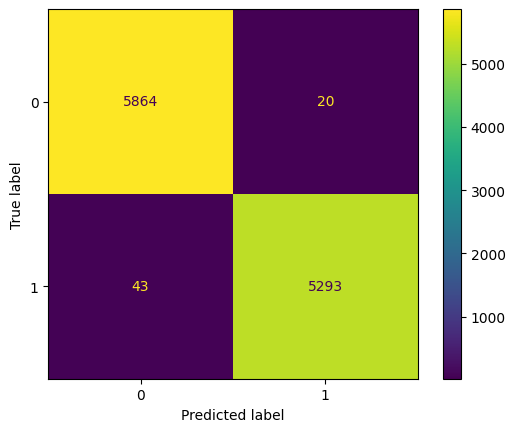

In [66]:
# confusion matrix 
cm = confusion_matrix(y_test, pred_dt)
disp = ConfusionMatrixDisplay(cm, display_labels = dt.classes_)
disp.plot()
plt.show()

Text(0.5, 0.98, 'ROC curve')

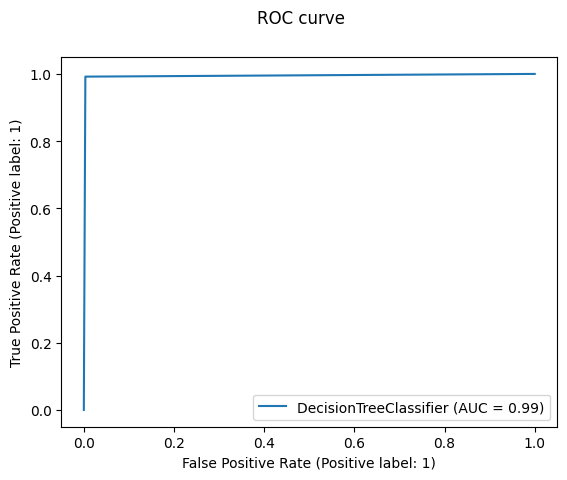

In [71]:
# roc curve 
dt_roc = RocCurveDisplay.from_estimator(dt, tfidf_test,y_test )
dt_roc.figure_.suptitle("ROC curve")

In [41]:
# performing 10-fold cross validation on decision tree classifier 
# cross validation provides a more accurate result of our accuracy score
tr_sc = cross_val_score(dt,tfidf_train,y_train, cv = 10)
te_sc = cross_val_score(dt,tfidf_test,y_test, cv = 10)

print('Decision Tree Classifier mean scores with cross val 10-fold:')
print(f'Mean accuracy score on training data {tr_sc.mean()} with deviation of {tr_sc.std()}.')
print(f'Mean accuracy score on testing data {te_sc.mean()} with deviation of {te_sc.std()}.')

Decision Tree Classifier mean scores with cross val 10-fold:
Mean accuracy score on training data 0.995186936227055 with deviation of 0.0011490080784940422.
Mean accuracy score on testing data 0.991354723707665 with deviation of 0.0027340216845236995.


In [42]:
# classification report
print(classification_report(pred_dt,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5907
           1       0.99      1.00      0.99      5313

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



# Gradient Boost Classifier

In [43]:
# import Gradient Boosting Classifier from sklearn
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
# instantiate our Gradient Boosting Classifier 
gb = GradientBoostingClassifier(random_state=0)
# train our model with the training sets
gb.fit(tfidf_train, y_train)

GradientBoostingClassifier(random_state=0)

In [45]:
# get predictions from testing set from Gradient Boosting Classifier
pred_gb = dt.predict(tfidf_test)

In [46]:
# checking accuracy score on testing set
accuracy = gb.score(tfidf_test, y_test)
print(f"Acuuracy on the Testing set: {accuracy}")

Acuuracy on the Testing set: 0.9947415329768271


In [47]:
# classification report
print(classification_report(y_test,pred_gb))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5884
           1       1.00      0.99      0.99      5336

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Random Forest Classifier

In [48]:
# import Random Forest Classifier from sklearn 
from sklearn.ensemble import RandomForestClassifier

In [49]:
# instantiate our model 
rf = RandomForestClassifier(random_state = 0)
# train our model on training data
rf.fit(tfidf_train,y_train)

RandomForestClassifier(random_state=0)

In [50]:
# get predictions using random forest classifier
pred_rf = rf.predict(tfidf_test)
# get accuracy score on testing set
rf.score(tfidf_test, y_test)

0.9896613190730837

In [51]:
# Classification report
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5884
           1       0.99      0.99      0.99      5336

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Fake News Prediction System

In [52]:
# function to to check the predicted class and return a string whether its a fake or true news
def output_label(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Real News"
    
# functions that gets a input of news(text) and does the same steps as above
# we get the news and put into a dataframe 
# we get the news text and clean it 
# we get the clean text and tfidf the text
# predict the news using the models we used
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test['text'].apply(wordopt)
    new_x_test = new_def_test['text']
    new_tfidf_test = vectorizer.transform(new_x_test)
    pred_log = log.predict(new_tfidf_test)
    pred_dt = dt.predict(new_tfidf_test)
    pred_gb = gb.predict(new_tfidf_test)
    pred_rf = rf.predict(new_tfidf_test)
    
    return print("\n\n Logistic Regression Prediction: {} \n Decicision Tree Prediction: {} \n Gradient Boost Prediction: {} \n Random Forest Prediction: {}".format(output_label(pred_log[0]),
                                                                                                                                                                       output_label(pred_dt[0]),
                                                                                                                                                                       output_label(pred_gb[0]),                                                                                                                                                                 output_label(pred_rf[0])))

In [53]:
# observe an example of fake news that we reserved in the beginning
data_fake_manual_testing['text'].values[2]

'Vic Bishop Waking TimesOur reality is carefully constructed by powerful corporate, political and special interest sources in order to covertly sway public opinion. Blatant lies are often televised regarding terrorism, food, war, health, etc. They are fashioned to sway public opinion and condition viewers to accept what have become destructive societal norms.The practice of manipulating and controlling public opinion with distorted media messages has become so common that there is a whole industry formed around this. The entire role of this brainwashing industry is to figure out how to spin information to journalists, similar to the lobbying of government. It is never really clear just how much truth the journalists receive because the news industry has become complacent. The messages that it presents are shaped by corporate powers who often spend millions on advertising with the six conglomerates that own 90% of the media:General Electric (GE), News-Corp, Disney, Viacom, Time Warner, 

In [54]:
# observe an example of true news that we reserved in the beginning
data_true_manual_testing['text'].values[3]

'COPENHAGEN (Reuters) - Danish police said on Tuesday the size of a headless female torso found on the sea s edge in Copenhagen suggested it could be that of a Swedish journalist who died after taking a submarine ride with the vessel s Danish inventor. Police said divers were still searching the area and they were investigating reports of other body parts that may have been spotted in Copenhagen harbor. Danish inventor Peter Madsen has been charged with killing Kim Wall, a Swedish journalist, in his home-made submarine.   We re dealing with a torso where arms, legs and head were cut off deliberately. The length of the torso doesn t speak against it being Kim Wall, but we still don t know,  Copenhagen police spokesman Jens Moller said in a video statement. Madsen told a court she had died in an accident on board the submarine and that he had buried her at sea, changing his earlier statement that he dropped her off alive in Copenhagen. Police are conducting DNA tests to identify the tors

In [55]:
# make the user put an input of news 
news = str(input())
# gets the users input and checks if the news is fake or real
manual_testing(news)



 Logistic Regression Prediction: Real News 
 Decicision Tree Prediction: Real News 
 Gradient Boost Prediction: Real News 
 Random Forest Prediction: Real News


In [56]:
#news = str(input())
#manual_testing(news)

Now we will deploy our fake news predictor system onto a web application with the help of a library called streamlit. We will first choose one effective algorithm and our tfid algorithm using the built-in module pickle. 

In [57]:
# import pickle module
import pickle

In [58]:
# save our model into a pickle file 
file_name_tfid = "tfid_algo.sav"

pickle.dump(vectorizer,open(file_name_tfid,'wb'))


file_name_tree = "decision_tree.sav"

pickle.dump(dt,open(file_name_tree,'wb'))

In [59]:
# saving  sample csv

# data_fake_manual_testing.to_csv("fake_samples.csv")
# data_true_manual_testing.to_csv("true_samples.csv")